In [1]:
import logging
import gym
import numpy as np
import os
import matplotlib.pyplot as plt

# add reference libraries here. Current structure will use the relative path from this file
libs = ["BouncingBall.mo"]

# check that all the paths to library package.mo files exist
# DymolaInterface() also checks this but I've found this warning helpful
for lib in libs:
    if not os.path.isfile(lib):
        print(f"Cannot find the library {lib}")

mo_name = "BouncingBall" # name of Modelica model in the Library.Model format
env_entry_point = 'examples:BouncingBallEnv' # Python package location of RL environment

time_step = 0.25 # time delta in seconds
positive_reward = 1
negative_reward = -100 # penalize RL agent for is_done
log_level = 0
default_action = []

# these config values are passed to the model specific environment class
# mo_name and libs are passed on to the DymolaBaseEnv class
config = {
    'mo_name': mo_name,
    'libs': libs,
    'time_step': time_step,
    'positive_reward': positive_reward,
    'negative_reward': negative_reward,
    'log_level': log_level,
    'default_action': default_action,
    'method':'DASSL'
}

# enable the model specific class as an OpenAI gym environment
from gym.envs.registration import register
env_name = "BouncingBallEnv-v0"

register(
    id=env_name,
    entry_point=env_entry_point,
    kwargs=config
)

env = gym.make(env_name)

resetting dymola...
dymola has been reset
the model will be reset
the model has been reset


C:\Users\Aisling\.conda\envs\myenv\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


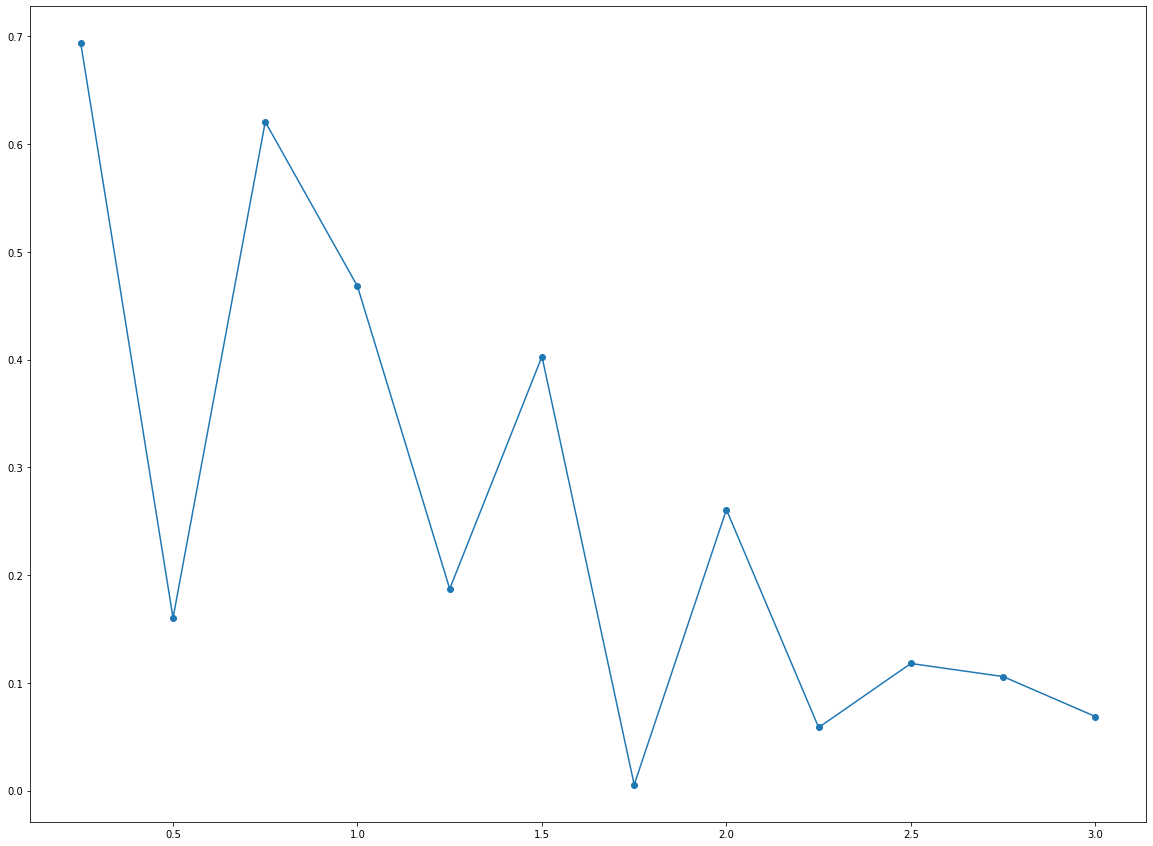

In [2]:
height_tracker = []
for _ in range(12):
    obs, reward, done, info = env.step([])
    obs += [env.start]
    height_tracker += obs

data = np.array(height_tracker)
plt.figure(figsize=(20,15))
plt.plot(data[1::2],data[::2])
plt.scatter(data[1::2],data[::2])

resetting dymola...
dymola has been reset
the model will be reset
the model has been reset


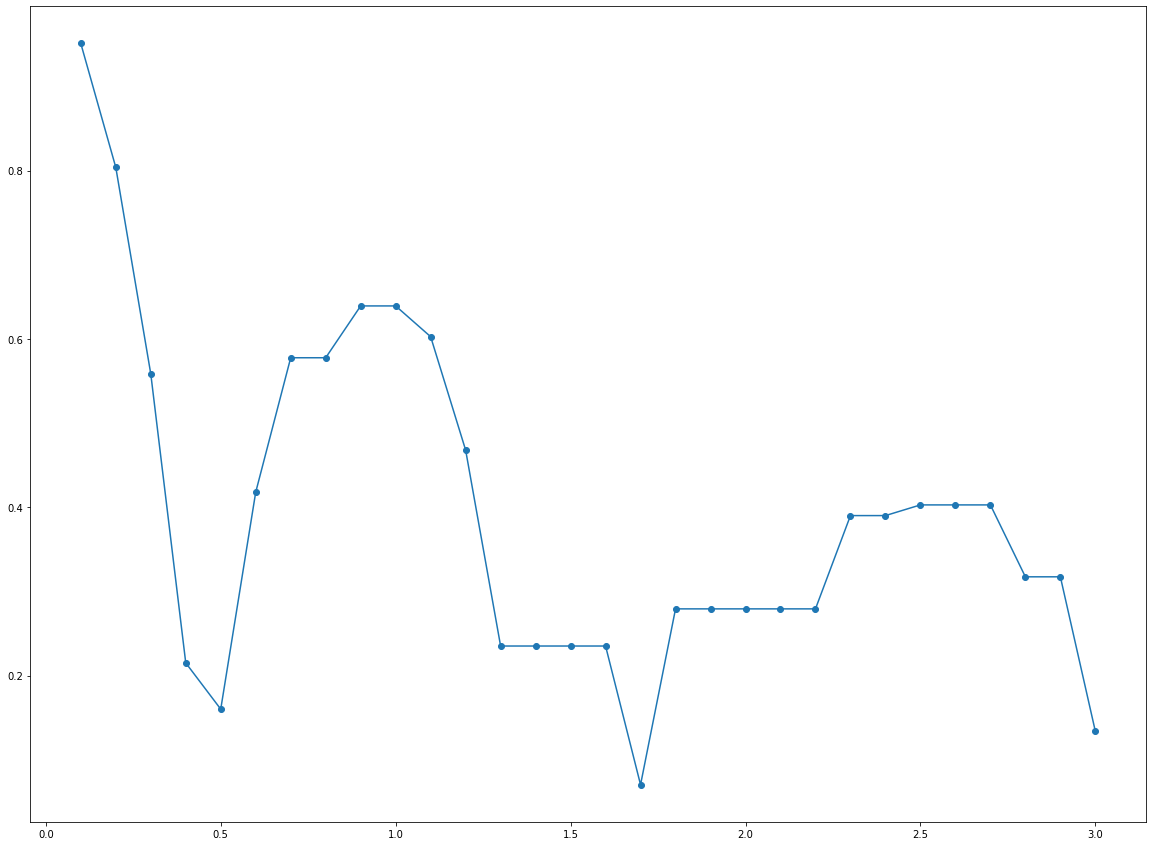

In [3]:
env.tau = 0.1
env.reset_dymola()
env.reset()

height_tracker = []
for _ in range(30):
    obs, reward, done, info = env.step([])
    obs += [env.start]
    height_tracker += obs
    
data = np.array(height_tracker)
plt.figure(figsize=(20,15))
plt.plot(data[1::2],data[::2])
plt.scatter(data[1::2],data[::2])

resetting dymola...
dymola has been reset
the model will be reset
the model has been reset


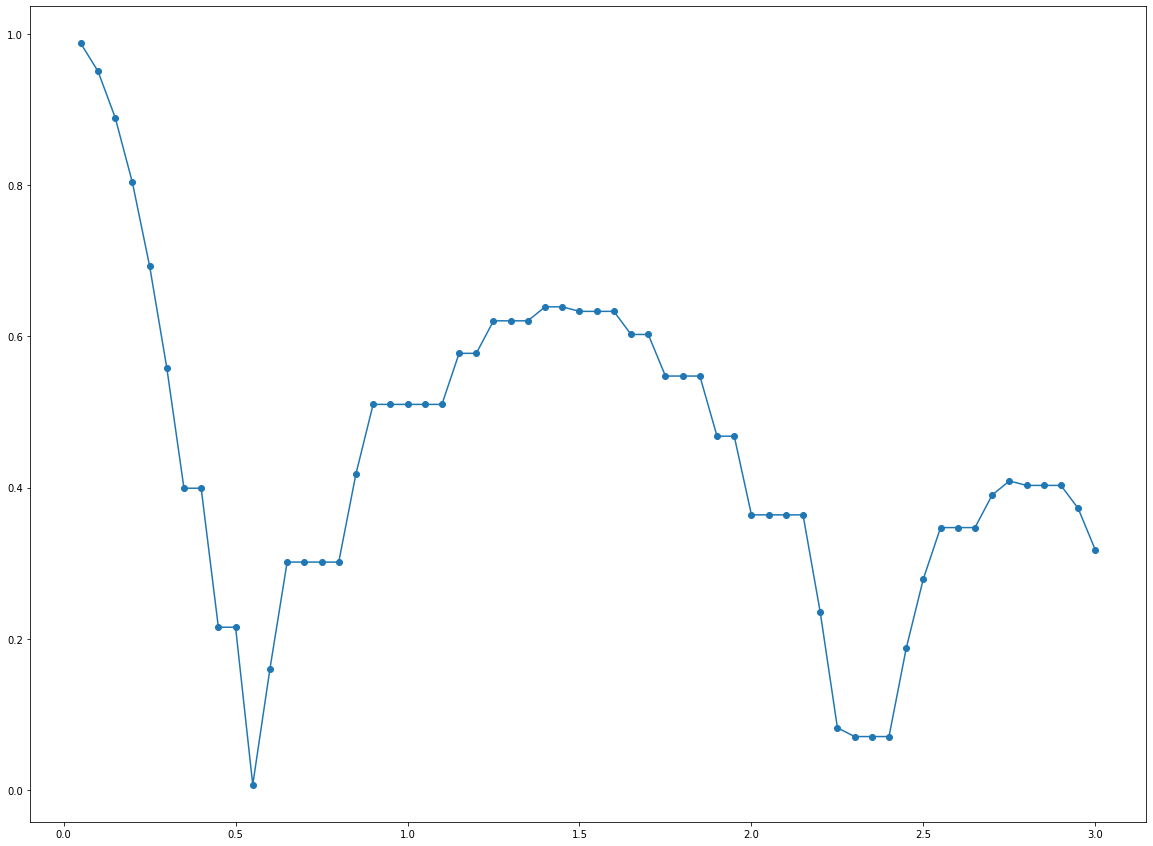

In [4]:
env.tau = 0.05
env.reset_dymola()
env.reset()

height_tracker = []
for _ in range(60):
    obs, reward, done, info = env.step([])
    obs += [env.start]
    height_tracker += obs
    
data = np.array(height_tracker)
plt.figure(figsize=(20,15))
plt.plot(data[1::2],data[::2])
plt.scatter(data[1::2],data[::2])

In [5]:
env.dymola.getLastError()

['Finished\n = true, {0.3174529396749541}\n', 0, 0, 2]

In [ ]:
# try now with Rkfix2 method
env.method = 'Rkfix2'

height_tracker = []
for _ in range(12):
    obs, reward, done, info = env.step([])
    obs += [env.start]
    height_tracker += obs

data = np.array(height_tracker)
plt.figure(figsize=(20,15))
plt.plot(data[1::2],data[::2])
plt.scatter(data[1::2],data[::2])